In [22]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plts
import seaborn as sns

In [23]:
df_TranAftCamp, df_Credit, df_Customers,df_transactions = [pd.read_csv(f) for f in ['./Data/avg_transactions_after_campaign.csv', './Data/credit_profiles.csv','./Data/customers.csv','./Data/transactions.csv']]

In [24]:
df_Credit2 = df_Credit.copy()
df_Credit2.shape,df_Credit.shape

((1004, 6), (1004, 6))

In [25]:
df_Customers2 = df_Customers.copy()
df_Customers2.shape,df_Customers.shape

((1000, 8), (1000, 8))

In [26]:
df_Credit2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


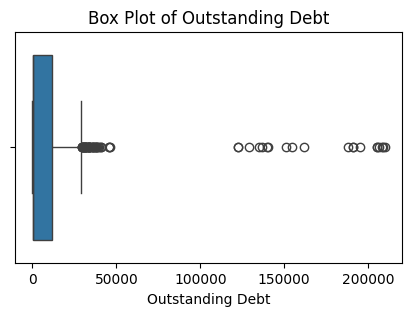

In [27]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df_Credit['outstanding_debt'])
plt.title('Box Plot of Outstanding Debt')
plt.xlabel('Outstanding Debt')
plt.show()

In [28]:
df_outstanding_debt_more_than_credit_limit = df_Credit2[df_Credit2['outstanding_debt'] > df_Credit2['credit_limit']]
df_outstanding_debt_more_than_credit_limit.shape

(18, 6)

In [29]:
df_outstanding_debt_more_than_credit_limit[['outstanding_debt', 'credit_limit']]

,outstanding_debt,credit_limit
1,161644.0,1250.0
19,205014.0,1500.0
25,190838.0,60000.0
38,122758.0,40000.0
93,137058.0,40000.0
204,187849.0,500.0
271,154568.0,40000.0
330,208898.0,60000.0
350,150860.0,500.0
446,206191.0,60000.0


In [30]:
df_Credit2['outstanding_debt'] = np.where(df_Credit2['outstanding_debt'] > df_Credit2['credit_limit'], df_Credit2['credit_limit'], df_Credit2['outstanding_debt'])

In [31]:
df_outstanding_debt_more_than_credit_limit = df_Credit2[df_Credit2['outstanding_debt'] > df_Credit2['credit_limit']]
df_outstanding_debt_more_than_credit_limit.shape

(0, 6)

In [32]:
##### Exploring Corrolation Bivariate Analysis We start by merging the Customer Data with the Credit Data 
# ###this way we can see the relationship between the two datasets and Credit Score extends the Customer Data information

In [33]:
df_merged = pd.merge(df_Customers2, df_Credit2, on='cust_id')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married,749,0.585171,19571.0,0.0,40000.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,587,0.107928,1250.0,2.0,1250.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,544,0.854807,513.0,4.0,1000.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,504,0.336938,224.0,2.0,1000.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,708,0.586151,18090.0,2.0,40000.0


In [34]:
df_merged2= df_merged.copy()
df_merged2.shape, df_merged.shape

((1004, 13), (1004, 13))

In [ ]:
##### Lets create a Corrlation of the numeric columns in the data frame

In [35]:
numeric_columns = df_merged2.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['cust_id', 'age', 'annual_income', 'credit_score', 'credit_utilisation',
       'outstanding_debt', 'credit_inquiries_last_6_months', 'credit_limit'],
      dtype='object')

In [36]:
corrolation = df_merged2[numeric_columns].corr()
corrolation

,cust_id,age,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
cust_id,1.000000,0.001659,0.004764,0.020799,0.000024,0.005564,0.029721,0.022274
age,0.001659,1.000000,0.472010,0.357283,-0.026364,0.301906,-0.024833,0.412956
annual_income,0.004764,0.472010,1.000000,0.573775,-0.099406,0.466096,0.009037,0.681139
credit_score,0.020799,0.357283,0.573775,1.000000,-0.070445,0.584742,-0.001226,0.844279
credit_utilisation,0.000024,-0.026364,-0.099406,-0.070445,1.000000,0.143456,-0.013952,-0.084046
outstanding_debt,0.005564,0.301906,0.466096,0.584742,0.143456,1.000000,0.044420,0.813659
credit_inquiries_last_6_months,0.029721,-0.024833,0.009037,-0.001226,-0.013952,0.044420,1.000000,0.024669
credit_limit,0.022274,0.412956,0.681139,0.844279,-0.084046,0.813659,0.024669,1.000000


In [39]:
##### Lets create a Heatmap of the Corrolation Matrix so we can visualize the Corrolation

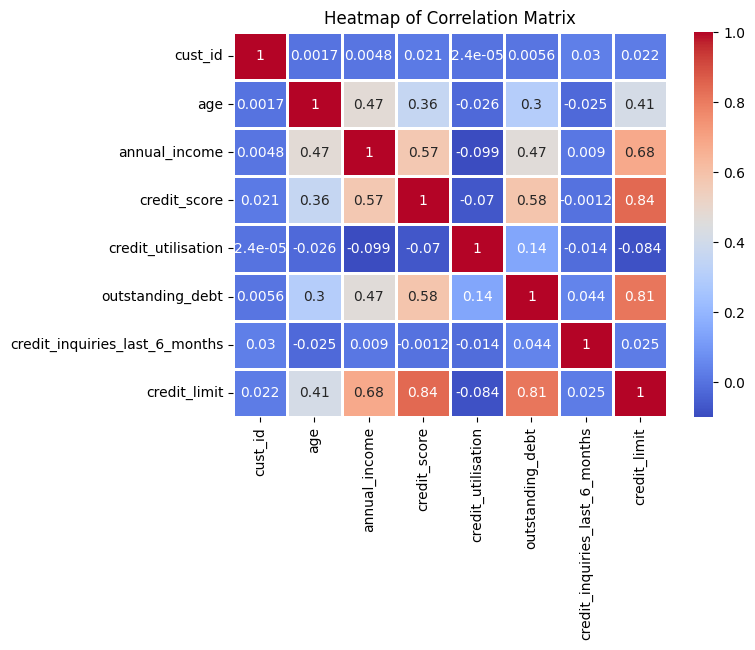

In [40]:
plt.figure(figsize=(7, 5))
sns.heatmap(corrolation, annot=True, cmap='coolwarm', linewidths=0.9)
plt.title('Heatmap of Correlation Matrix')
plt.show()

                  annual_income  credit_score  outstanding_debt  credit_limit
annual_income               NaN           NaN               NaN      0.681139
credit_score                NaN           NaN               NaN      0.844279
outstanding_debt            NaN           NaN               NaN      0.813659
credit_limit           0.681139      0.844279          0.813659           NaN


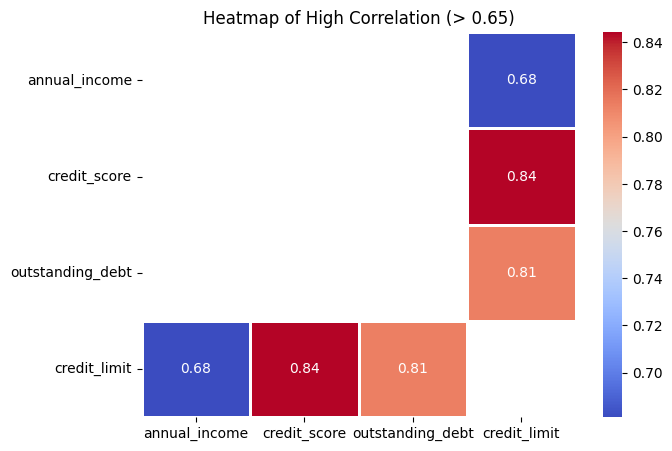

In [41]:
# Filter the correlation matrix to get only the correlations greater than 0.65
high_corr = corrolation[(corrolation > 0.65) & (corrolation != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Display the filtered correlation matrix
print(high_corr)

# Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', linewidths=0.9)
plt.title('Heatmap of High Correlation (> 0.65)')
plt.show()

In [42]:
# Create a new DataFrame from the high_corr variable
df_high_corr = pd.DataFrame(high_corr)

# Display the new DataFrame
df_high_corr

,annual_income,credit_score,outstanding_debt,credit_limit
annual_income,NaN,NaN,NaN,0.681139
credit_score,NaN,NaN,NaN,0.844279
outstanding_debt,NaN,NaN,NaN,0.813659
credit_limit,0.681139,0.844279,0.813659,NaN


In [49]:
# Display the high correlation table
high_corr2 = high_corr.copy()

In [66]:
# Define the correlation threshold
correlation_threshold = 0.65

# Create an empty list to store the tables
correlation_tables = []

# Iterate through the correlation matrix
for col1 in corrolation.columns:
    for col2 in corrolation.columns:
        if col1 != col2 and abs(corrolation.loc[col1, col2]) > correlation_threshold:
            table = pd.DataFrame({
                col1: ['correlated' if abs(corrolation.loc[col1, col2]) <= 0.80 else 'highly-correlated'],
                col2: ['correlated' if abs(corrolation.loc[col1, col2]) <= 0.80 else 'highly-correlated']
            })
            correlation_tables.append(table)
            print(f"Table for {col1} and {col2} correlation:")
            print(table)
            print()
            pd.DataFrame(table)

Table for annual_income and credit_limit correlation:
  annual_income credit_limit
0    correlated   correlated

Table for credit_score and credit_limit correlation:
        credit_score       credit_limit
0  highly-correlated  highly-correlated

Table for outstanding_debt and credit_limit correlation:
    outstanding_debt       credit_limit
0  highly-correlated  highly-correlated

Table for credit_limit and annual_income correlation:
  credit_limit annual_income
0   correlated    correlated

Table for credit_limit and credit_score correlation:
        credit_limit       credit_score
0  highly-correlated  highly-correlated

Table for credit_limit and outstanding_debt correlation:
        credit_limit   outstanding_debt
0  highly-correlated  highly-correlated



In [ ]:
# pd.DataFrame(table).to_csv('./Data/table_result.csv', index=False)